Список стран по производству риса
https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D1%83_%D1%80%D0%B8%D1%81%D0%B0


#Скачала данные из табличек + информацию о географических данных (широта и долгота) + подчистила датасет.

In [ ]:
import urllib, requests, socket, re, lxml, io, bs4, sqlite3, pandas, sqlalchemy
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://ru.wikipedia.org/w/index.php?title=Список_стран_по_производству_риса&oldid=132607629'
"""8 марта на сайте были измения, там удалилась ссылка на Китай.
и сам Китай стал cn Китай, поэтому взяла старую версию сайта"""
html = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html,'html.parser')
table1 = soup.find('table', class_ ='wikitable sortable')
headers = []
for i in table1.find_all('th'):
  title = i.text
  headers.append(title)
headers = headers[0:2] + ['2000\n', '2008\n', '2016\n', '2018\n', '2019\n']

In [ ]:
info = []
for row in table1.find_all('tr'):
    cols = row.find_all('td')
    row = [i.text.strip() for i in cols]
    info.append([row[j] for j in range(len(row))])
del info[0]
df = pd.DataFrame(info, columns = headers)
df.to_csv('rice.csv', index=False)
names = df[headers[1]].tolist()

пока создали таблицу чисто как с  википедии, далее добавим геогр информацию.

In [ ]:
from requests.compat import urljoin, quote_plus, urlparse, unquote
hrefs = soup.find_all('a')
links = [urljoin(url, link.get('href')) for link in hrefs]

In [ ]:
exceptions = ['Демократическая_Республика_Конго','Соединённые_Штаты_Америки', 'Республика_Корея', 'Корейская_Народно-Демократическая_Республика']
names = exceptions + names
def filter(links, keyword= names):
    filtered_links = []
    for link in links:
        for word in keyword:
          if word in link:
            flag = True
            break
          else:
            flag = False
        if flag:
          filtered_links.append(link)
    return filtered_links


In [ ]:
links = [unquote(link) for link in links]
filtered_links = filter(links)



In [ ]:
capital = []
for link in filtered_links:
  html2 = requests.get(link).text
  soup = BeautifulSoup(html2,'html.parser')
  table = soup.find('table')
  sub = [i for i in table.find_all('a')]
  ind = [i for i in range(len(sub)) if "Столица" in sub[i]]
  capital.append(sub[ind[0]+1])

In [ ]:
links_cap = [urljoin(url, link.get('href')) for link in capital]
links_cap = [unquote(link) for link in links_cap]

In [ ]:
lat_1 = []
lon_1 = []
for link in links_cap:
  html3 = requests.get(link).text
  soup = BeautifulSoup(html3,'html.parser')
  lat = soup.find('a', class_='mw-kartographer-maplink')['data-lat']
  lon = soup.find('a', class_='mw-kartographer-maplink')['data-lon']
  lat_1.append({link: lat})
  lon_1.append({link: lon})

In [ ]:
df_lat = pd.DataFrame([i.values() for i in lat_1], columns = ['Широта '])
df_lon = pd.DataFrame([i.values() for i in lon_1], columns=['Долгота'])
df_3 = pd.concat([df, df_lat, df_lon], axis = 1)
df_3.columns = [col[:-1] for col in df_3.columns[:-1]] + [df_3.columns[-1]]
df_3

,№,Страна,2000,2008,2016,2018,2019,Широта,Долгота
0,1,Китай,189 814 060,193 354 180,211 094 000,212 129 000,209 614 000,39.90403,116.407526
1,2,Индия,127 465 000,148 770 000,163 700 000,172 580 000,177 645 000,28.61667,77.21667
2,3,Индонезия,51 898 000,60 251 100,79 355 000,83 037 000,54 604 033,-6.16667,106.8
3,4,Бангладеш,37 627 500,46 742 000,50 452 866,56 417 319,54 586 344,23.7,90.36667
4,5,Вьетнам,32 529 500,38 725 100,43 112 010,44 046 250,43 448 504,21.1,105.81667
5,6,Таиланд,25 844 000,31 650 600,26 652 995,32 192 087,28 356 869,13.75,100.51667
6,7,Мьянма,21 323 900,32 573 000,25 672 832,25 418 142,26 269 814,19.7285,96.087889
7,8,Филиппины,12 389 400,16 815 500,17 627 245,19 066 094,18 814 827,14.58333,121
8,9,Пакистан,7 203 900,10 428 000,10 273 500,10 802 949,11 115 428,33.66667,73.16667
9,10,Камбоджа,4 026 090,7 175 470,9 952 000,10 647 212,10 886 000,11.55,104.91667


In [ ]:
df_3.set_index('№', inplace=True)


In [ ]:
df_3.to_csv('rice+geo.csv', index=True)


#Визуализировала графики без учёта координат.

Нужно сделать не менее 3 различных **информативных** графиков с учётом данных из части 1.

Данные, которые есть: каждая линия будет отвечать за страну, ось икс за год, ось игрек за тонны

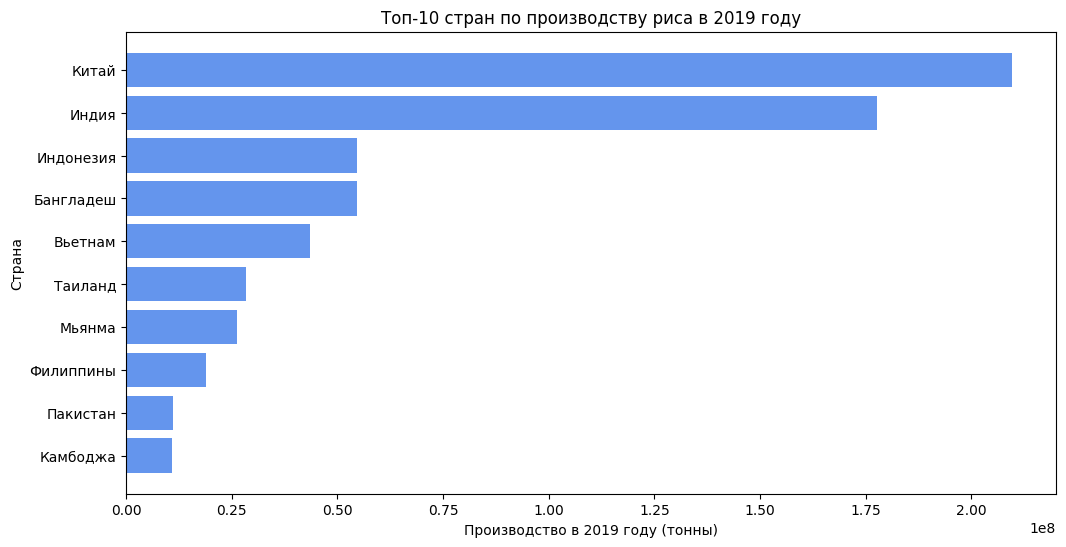

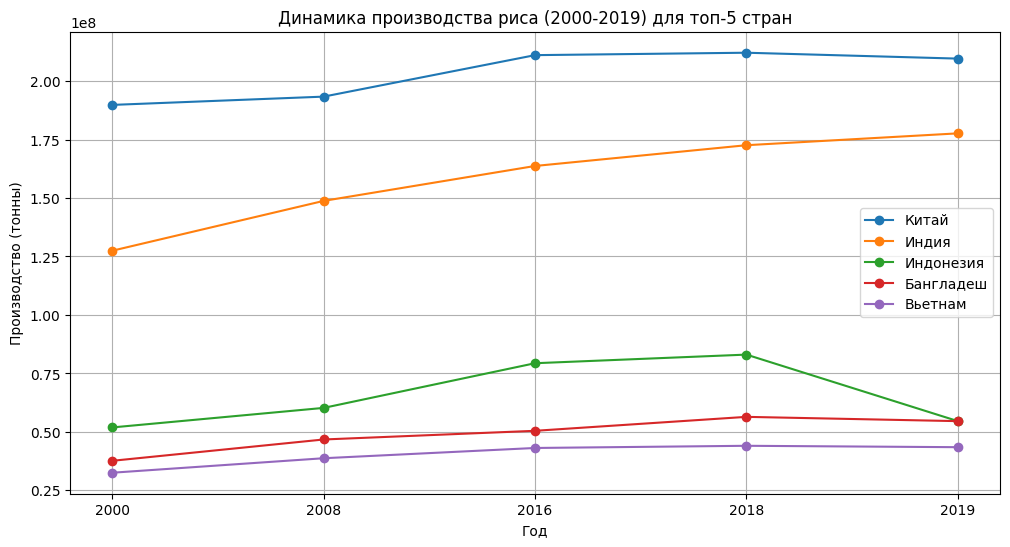

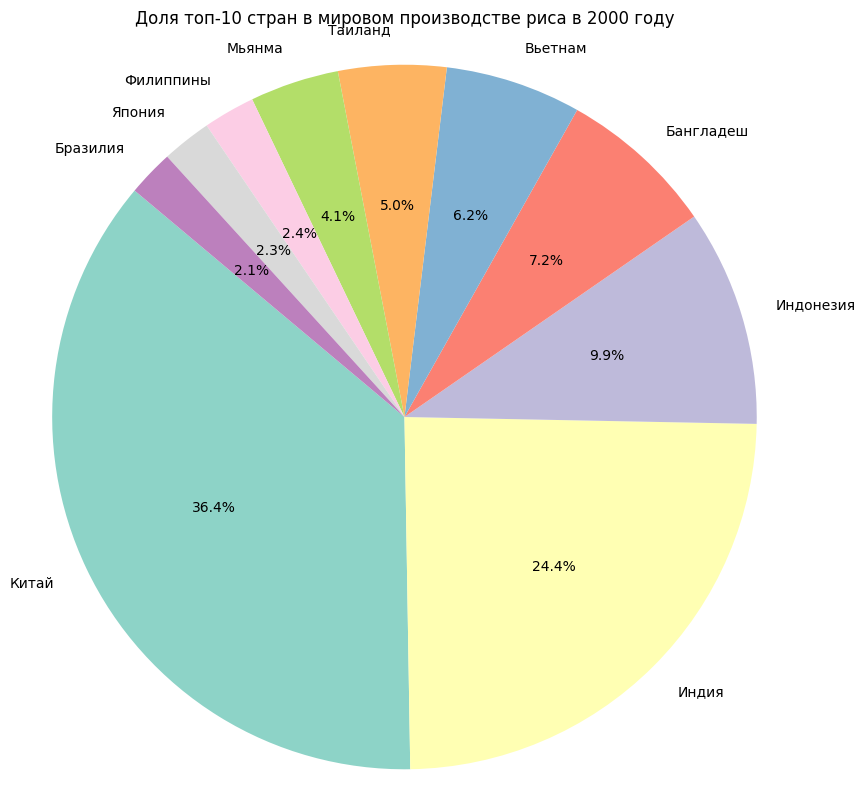

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/rice+geo.csv')
columns_to_clean = ["2000", "2008", "2016", "2018", "2019"]

for col in columns_to_clean:
    df[col] = df[col].astype(str).str.replace(" ", "").str.replace(",", "").astype(float)


top_countries = df.nlargest(10, "2019")
plt.figure(figsize=(12, 6))
plt.barh(top_countries["Страна"], top_countries["2019"], color="cornflowerblue")
plt.xlabel("Производство в 2019 году (тонны)")
plt.ylabel("Страна")
plt.title("Топ-10 стран по производству риса в 2019 году")
plt.gca().invert_yaxis()
plt.show()

top_5_countries = df.nlargest(5, "2019")[["Страна", "2000", "2008", "2016", "2018", "2019"]].set_index("Страна").T
plt.figure(figsize=(12, 6))
for country in top_5_countries.columns:
    plt.plot(top_5_countries.index, top_5_countries[country], marker="o", label=country)
plt.xlabel("Год")
plt.ylabel("Производство (тонны)")
plt.title("Динамика производства риса (2000-2019) для топ-5 стран")
plt.legend()
plt.grid(True)
plt.show()


top_10_countries_2000 = df.nlargest(10, "2000")
cmap = plt.get_cmap("Set3")
colors = [cmap(i) for i in range(10)]
plt.figure(figsize=(10, 10))
plt.pie(
    top_10_countries_2000["2000"],
    labels=top_10_countries_2000["Страна"],
    autopct="%1.1f%%",
    startangle=140,
    colors=colors
)
plt.title("Доля топ-10 стран в мировом производстве риса в 2000 году")
plt.axis("equal")
plt.show()


#Визуализировала графики на картах при помощи plotly.

In [ ]:
import plotly.express as px
import pandas as pd

data = pd.read_csv('/content/rice+geo.csv')
numeric_columns = ['2000', '2008', '2016', '2018', '2019']
for col in numeric_columns:
    data[col] = data[col].replace(' ', '', regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')
fig = px.scatter_geo(data, lon='Долгота', lat='Широта', size='2000', color='2000',
color_continuous_scale='plasma', hover_name='Страна', title='Производство риса по странам в 2000 году',
labels={'2000': 'Производство риса (тонн)'})
fig.update_geos(projection_type="natural earth")

fig.update_layout(
    width=1200,
    height=800
)
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv( "rice+geo.csv")

columns_to_clean = ["2000", "2008", "2016", "2018", "2019"]
for col in columns_to_clean:
    df[col] = df[col].astype(str).str.replace(" ", "").str.replace(",", "").astype(float)

df.rename(columns={"Страна": "Country"}, inplace=True)

top_countries_2019 = df.nlargest(10, "2019")

fig1 = px.bar(
    top_countries_2019,
    x="Country",
    y="2019",
    text="2019",
    title="Топ-10 стран по производству риса в 2019 году",
    labels={"2019": "Производство (тонны)", "Country": "Страна"},
    color="2019",
    color_continuous_scale="Blues"
)
fig1.show()

top_5_countries = df.nlargest(5, "2019")[["Country", "2000", "2008", "2016", "2018", "2019"]].set_index("Country").T

fig2 = go.Figure()
for country in top_5_countries.columns:
    fig2.add_trace(go.Scatter(x=top_5_countries.index, y=top_5_countries[country], mode='lines+markers', name=country))

fig2.update_layout(
    title="Динамика производства риса (2000-2019) для топ-5 стран",
    xaxis_title="Год",
    yaxis_title="Производство (тонны)",
    template="plotly_white"
)
fig2.show()


# Получила данные о текущей погоде в этих географических точках при помощи Яндекс API.

In [ ]:
from google.colab import userdata
yw_key = userdata.get('Yandex_weather')

In [ ]:
import pandas as pd
import requests

def get_weather(lat, lon, api_key):
    headers = {'X-Yandex-Weather-Key': api_key}
    query = f"""{{
      weatherByPoint(request: {{ lat: {lat}, lon: {lon}}}) {{
        now {{
          temperature
        }}
      }}
    }}"""

    try:
        response = requests.post(
            "https://api.weather.yandex.ru/graphql/query",
            headers=headers,
            json={'query': query}
        )
        if response.status_code == 200:
            data = response.json()
            return data['data']['weatherByPoint']['now']
        return None
    except Exception as e:
        return None


df = pd.read_csv('/content/rice+geo.csv')
weather_data = []

for index, row in df.iterrows():
    weather = get_weather(row['Широта'], row['Долгота'], yw_key)
    if weather is not None:
        weather.update({
            'Страна': row['Страна'],
            'Широта': row['Широта'],
            'Долгота': row['Долгота']
        })
        weather_data.append(weather)
    else:
        None

weather_df = pd.DataFrame(weather_data)
weather_df


,temperature,Страна,Широта,Долгота
0,4,Китай,39.904030,116.407526
1,19,Индия,28.616670,77.216670
2,26,Индонезия,-6.166670,106.800000
3,24,Бангладеш,23.700000,90.366670
4,17,Вьетнам,21.100000,105.816670
5,26,Таиланд,13.750000,100.516670
6,23,Мьянма,19.728500,96.087889
7,27,Филиппины,14.583330,121.000000
8,13,Пакистан,33.666670,73.166670
9,27,Камбоджа,11.550000,104.916670


# Визуализировала данные о погоде на картах при помощи plotly.

In [ ]:
weather_df.to_csv('weather.csv', index=True)

In [ ]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('/content/weather.csv')
fig = px.scatter_geo(df,
                     lat='Широта',
                     lon='Долгота',
                     hover_name='Страна',
                     size_max=15,
                     color='temperature',
                     scope='world',
                     title='Температура в разных странах',
                     labels={'temperature': 'Температура (°C)'},
                     projection='natural earth')

fig.update_geos(
    showcountries=True,
    countrycolor="Black",
    showocean=True,
    oceancolor="LightBlue"
)

fig.show()